In [30]:
import pandas as pd
import numpy as np
import gurobipy as gp

## Question 1

Max is in a pie eating contest that lasts 1 hour. Each torte that he eats takes 2 minutes to eat. Each apple pie that he eats takes 3 minutes. He receives 4 points for each torte and 5 points for each pie. Find the number of tortes and apple pies Max should eat to get the most points. Solve the problem using the graphical method.

Next, let’s see what happens if he would like to stick to his preference of eating at least as many pies as tortes. That is; the number of pies he eats should be greater than or equal to the number of tortes.

 

By how many points does this constraint decrease Max’s total points? (this is the part you will submit to the canvas answer.)

### Given :
total = 60 min <br>
1 torte = 2 min <br>
1 apple = 3 min <br>
1 torte = 4 pts <br>
1 apple = 5 pts <br>
Maximize : $$4x+5y$$
Constraint : $$2x + 3y \leq 60$$ $$x,y \geq 0$$ $$x-y =0$$


### Part 1 using graphical method :

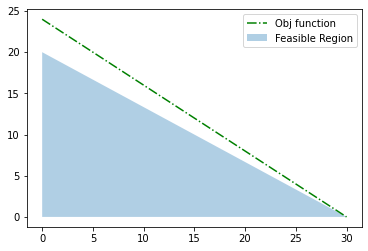

In [31]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,30,100)
y=(60-(2*x))/3
 
# Area plot
plt.fill_between(x, y, alpha = 0.35, label = 'Feasible Region')

plt.plot(x, (120-4*x)/5,'-.g', label='Obj function')

plt.legend(loc='best')
plt.show()

We check the objective function at both the critical points of the lpp, with $ (30,0) $ giving value of objective function as 120. The critical point $(0,20)$ gives value of 100 which is lower than the previous value. Hence objective function is maximized at $ (30,0) $

### Part 2 using graphical method :

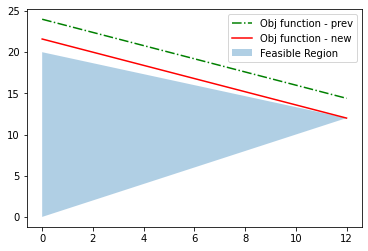

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,12,100)
y=(60-(2*x))/3
 
# Area plot
plt.fill_between(x, y1=y , y2=x, alpha = 0.35, label = 'Feasible Region')

plt.plot(x, (120-4*x)/5,'-.g', label='Obj function - prev')
plt.plot(x, (108-4*x)/5,'-r', label='Obj function - new')

plt.legend(loc='best')
plt.show()

Due to addition of the new constraints, the previous critical point does not lie int he feasible region. The new critical point $(12,12)$ gets maximum value as 108. **Difference in the maximized objective function is 12.**

### Checking using Gurobi

In [33]:
obj = np.array([4,5]) # objective vector
A = np.zeros((2,2))
A[0,:] = [2,3] # first constraint
A[1,:] = [1,-1] # second constraint

b = np.array([60,0]) # output
sense = np.array(['<','=']) # all constraints are less than or equal constraints
print(A)

[[ 2.  3.]
 [ 1. -1.]]


In [34]:
print(b)

[60  0]


In [35]:
ojModel = gp.Model() # initialize an empty model
ojModX = ojModel.addMVar(2) # tell the model how many variables there are
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel.Params.OutputFlag = 0 

In [36]:
ojModel.optimize() 

In [37]:
ojModel.objVal 


108.0

In [38]:
ojModX.x 

array([12., 12.])

## Question 2

A farmer in Iowa owns 450 acres of land. He is going to plant each acre with wheat or corn. Each acre planted with wheat (corn) yields $2,000 ($3,000) profit, requires three (two) workers, and requires two (four) tons of fertilizer. There are currently 1,000 workers and 1,200 tons of fertilizer available.

Formulate and solve this problem using gurobi.

Next we want to see What happens to the decision variables and the total profit when the availability of fertilizer varies from 200 tons to 2200 tons in 100-ton increments.

At what level of fertilizer does the farmer discontinue producing wheat?  That is, what is the smallest level of available fertilizer that results in no wheat being produced?  Your answer should be one of the 100 ton incremental numbers, like 600 or 1300 or...

### Given :
total = 450 acres <br>
total workers = 1000 <br>
total fertilizer = 1200 <br>
1 acre wheat = 2000 profit with 3 workers and 2 ton fertilizer<br>
1 acre corn = 3000 profit with 2 workers and 4 ton fertilizer<br>

Maximize : $$2000x+3000y$$
Constraint : $$3x + 2y \leq 1000$$ $$2x + 4y \leq 1200$$ $$x+y =450$$


### Solving using Gurobi

In [39]:
obj = np.array([2000,3000]) # objective vector
A = np.zeros((3,2))
A[0,:] = [3,2] # first constraint
A[1,:] = [2,4] # second constraint
A[2,:] = [1,1] # third constraint

b = np.array([1000,1200,450]) # output
sense = np.array(['<','<','<']) # all constraints are less than or equal constraints
print(A)

[[3. 2.]
 [2. 4.]
 [1. 1.]]


In [40]:
ojModel = gp.Model() 
ojModX = ojModel.addMVar(2) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 
ojModel.Params.OutputFlag = 0 
ojModel.optimize() # solve the LP

In [41]:
ojModel.objVal

1000000.0

In [42]:
ojModX.x

array([200., 200.])

In [43]:
profit = list()
x_val = list()
for i in range(200,2300,100):
    b = np.array([1000,i,450]) # output
    ojModel = gp.Model() 
    ojModX = ojModel.addMVar(2) 
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
    ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 
    ojModel.Params.OutputFlag = 0 
    ojModel.optimize() # solve the LP
    profit.append(ojModel.objVal)
    x_val.append(ojModX.x[0])

In [50]:
list(range(200,2300,100))[np.array(x_val).argmin()]

1800

## Question 3

Star Oil Company is considering five different investment opportunities. The table below gives the required cash outflows and net present values in millions of dollars.

Star Oil has 40 million available for investment now (time 0); it estimates that one year from now (time 1) 20 million will be available for investment. Star Oil may purchase any fraction of each investment, but no more than 100% of each opportunity. In this case, the cash outflows and NPV are adjusted accordingly.

For example, if Star Oil purchases one-fifth of investment 3, then a cash outflow of 1/5 × 5 = 1 million dollars would be required at time 0, and a cash outflow of 1/5 × 5 = 1 million would be required at time 1. The one-fifth share of investment three would yield an NPV of 1/5 ∗ 16 = 3.2 million dollars. Star Oil wants to maximize the NPV that can be obtained by investing in investments 1-5. Formulate an LP that will help achieve this goal. Assume that any funds leftover at time 0 cannot be used at time 1.

What percentage of opportunity 3 should be Star Oil invest in?  Answer in decimals, so if your answer is 54%, you should input 0.54.  Round 2 to decimal places

### Given :
n = 5 investment <br>
total inv = 40M at $t_0$ <br>
inv available = 20M at $t_1$ <br>



Maximize: $$ 13a_1 + 16b_1 + 16c_1 + 14d_1 + 39e_1 $$

Constraints:<br>
$$ 11a_1 + 53b_1 + 5c_1 + 5d_1 + 29e_1 < 40 $$
$$ 3a_1 + 6b_1 + 5c_1 + d_1 + 34e_1 < 20 $$
$$ a_1 < 1 $$
$$ b_1 < 1 $$
$$ c_1 < 1 $$
$$ d_1 < 1 $$
$$ e_1 < 1 $$

 

In [75]:
obj = np.array([13,16,16,14,39]) # objective vector
A = np.zeros((7,5))
A[0,:] = [11,53,5,5,29] # first constraint
A[1,:] = [3,6,5,1,34] # second constraint
A[2,:] = [1,0,0,0,0] # third constraint
A[3,:] = [0,1,0,0,0] # fourth constraint
A[4,:] = [0,0,1,0,0]
A[5,:] = [0,0,0,1,0]
A[6,:] = [0,0,0,0,1]


b = np.array([40,20,1,1,1,1,1]) # output
sense = np.array(['<','<','<','<','<','<','<']) # all constraints are less than or equal constraints
print(A)

[[11. 53.  5.  5. 29.]
 [ 3.  6.  5.  1. 34.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [76]:
ojModel = gp.Model() 
ojModX = ojModel.addMVar(5) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 
ojModel.Params.OutputFlag = 0 
ojModel.optimize() # solve the LP

In [77]:
ojModel.objVal

57.449017199017206

In [78]:
ojModX.x

array([1.        , 0.20085995, 1.        , 1.        , 0.28808354])

## Question 4

The goal of this problem is to select a set of foods that will satisfy a set of daily nutritional requirement at minimum cost. Suppose there are three foods available, corn, milk, and bread. There are restrictions on the number of calories (between 2000 and 2250) and the amount of Vitamin A (between 5000 and 50,000) that can be eaten. The table below shows, for each food, the cost per serving, the amount of Vitamin A per serving, and the number of calories per serving. Also, the maximum number of servings for each food is 10.

How many servings of corn should you eat?  Round to 2 decimal places.

### Given :
n = 3 <br>
$2000 \leq cal \leq 2250$ <br>
$5000 \leq A \leq 50000$ <br>
max serving = 10



Minimize : $$0.18x+0.23y+0.05z$$
Constraint : 
$$2000 \leq 72x+121y+65z \leq 2250$$
$$5000 \leq107x+500y+0z \leq 50000$$
$$x,y,z \leq 10$$


In [58]:
obj = np.array([0.18,0.23,0.05]) # objective vector
A = np.zeros((7,3))
A[0,:] = [72,121,65] # first constraint
A[1,:] = [72,121,65] # second constraint
A[2,:] = [107,500,0] # third constraint
A[3,:] = [107,500,0] # fourth constraint
A[4,:] = [1,0,0]
A[5,:] = [0,1,0]
A[6,:] = [0,0,1]


b = np.array([2000,2250,5000,50000,10,10,10]) # output
sense = np.array(['>','<','>','<','<','<','<']) # all constraints are less than or equal constraints
print(A)

[[ 72. 121.  65.]
 [ 72. 121.  65.]
 [107. 500.   0.]
 [107. 500.   0.]
 [  1.   0.   0.]
 [  0.   1.   0.]
 [  0.   0.   1.]]


In [59]:
ojModel = gp.Model() 
ojModX = ojModel.addMVar(3) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE) 
ojModel.Params.OutputFlag = 0 
ojModel.optimize() # solve the LP

In [60]:
ojModel.objVal

3.1500000000000004

In [61]:
ojModX.x

array([ 1.94444444, 10.        , 10.        ])

## Question 5

Paper and wood products companies need to define cutting schedules that will maximize the total wood yield of their forests over some planning period. Suppose that a firm with control of 2 forest units wants to identify the best cutting schedule over a planning horizon of 3 years. Forest unit 1 has a total acreage of 2 and unit 2 has a total of 3 acres. The studies that the company has undertaken predict that each acre in unit 1(2) will have 1, 1.3, 1.4 (1, 1.2, 1.6) tons of woods per acre available for harvesting in year 1, 2, 3 respectively. Based on its prediction of economic conditions, the company believes that it should harvest at least 1.2, 1.5, 2 tons of wood in year 1, 2, 3 separately. Due to the availability of equipment and personnel, the company can harvest at most 2, 2, 3 tons of wood in year 1, 2, 3. Find the company’s best cutting strategy that maximizes the total weights of wood. Here discounting of the time value should not be considered.  If some fraction of a forest unit is cut down in year 1, that part of the forest cannot be cut again for the remaining 2 years.  Similarly if some fraction of the forest unit is cut down in year 2 it cannot be cut in year 3.


In year 3, how many acres of forest unit 2 should be cut down?  Round to 2 decimal places.

### Given :
2 forest units
3 years
unit 1 : 2 acres
unit 2 : 3 acres

Wood unit 1 : 1, 1.3 , 1.4
Wood unit 1 : 1, 1.2 , 1.6

Harvest needed : 1.2, 1.5, 2

Constraint on harvest : 2 , 2, 3


Let the area of unit 1 cut be x1, x2, x3 and area of unit 2 cut in three years be y1, y2, y3

Maximize :
$$x_1 + 1.3x_2 + 1.4x_3 + y + 1.2y_2 + 1.6y_3$$
Constraints : $$x_1 + x_2 + x_3 = 2$$
$$y_1 + y_2 + y_3 = 3$$
$$1.2 \leq x_1+y_1  \leq 2$$
$$1.5 \leq 1.3x_2+1.2y_2  \leq 2$$
$$2 \leq 1.4x_3+1.6y_3  \leq 3$$

In [70]:
obj = np.array([1,1.3,1.4,1,1.2,1.6]) # objective vector
A = np.zeros((8,6))
A[0,:] = [1,1,1,0,0,0] # first constraint
A[1,:] = [0,0,0,1,1,1] # second constraint
A[2,:] = [1,0,0,1,0,0] # third constraint
A[3,:] = [1,0,0,1,0,0] # fourth constraint

A[4,:] = [0,1.3,0,0,1.2,0] # fifth constraint
A[5,:] = [0,1.3,0,0,1.2,0] # sixth constraint
A[6,:] = [0,0,1.4,0,0,1.6] # seventh constraint
A[7,:] = [0,0,1.4,0,0,1.6] # eighth constraint



b = np.array([2,3,1.2,2,1.5,2,2,3]) # output
sense = np.array(['=','=','>','<','>','<','>','<']) # all constraints are less than or equal constraints
print(A)

[[1.  1.  1.  0.  0.  0. ]
 [0.  0.  0.  1.  1.  1. ]
 [1.  0.  0.  1.  0.  0. ]
 [1.  0.  0.  1.  0.  0. ]
 [0.  1.3 0.  0.  1.2 0. ]
 [0.  1.3 0.  0.  1.2 0. ]
 [0.  0.  1.4 0.  0.  1.6]
 [0.  0.  1.4 0.  0.  1.6]]


In [71]:
ojModel = gp.Model() 
ojModX = ojModel.addMVar(6) 
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) 
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 
ojModel.Params.OutputFlag = 0 
ojModel.optimize() # solve the LP

In [72]:
ojModel.objVal

6.586538461538462

In [73]:
ojModX.x

array([0.46153846, 1.53846154, 0.        , 1.125     , 0.        ,
       1.875     ])